## Load corpus

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.express as px


import nltk
from nltk.corpus import stopwords
from textblob import Word

In [6]:
df = pd.read_csv('data/fed_speeches_1996_2020.csv')
df.head()

,link,title,speaker,event,year,text,date,text_len,location
0,https://www.federalreserve.gov/boarddocs/speec...,Supervision of bank risk-taking,Vice Chair Alice M. Rivlin,At the The Brookings Institution National Issu...,1996.0,I discovered when I joined the Board of Govern...,19961219.0,3671,D.C.
1,https://www.federalreserve.gov/boarddocs/speec...,Social security,Chairman Alan Greenspan,At the Abraham Lincoln Award Ceremony of the U...,1996.0,I am privileged to accept the Union League of...,19961206.0,2596,Pennsylvania
2,https://www.federalreserve.gov/boarddocs/speec...,The challenge of central banking in a democrat...,Chairman Alan Greenspan,At the Annual Dinner and Francis Boyer Lecture...,1996.0,The Challenge of Central Banking in a Democrat...,19961205.0,4344,D.C.
3,https://www.federalreserve.gov/boarddocs/speec...,Clearinghouses and risk management,"Governor Edward W. Kelley, Jr.","At the 1996 Payments System Risk Conference, W...",1996.0,It is a pleasure to be with you this morning ...,19961203.0,2527,D.C.
4,https://www.federalreserve.gov/boarddocs/speec...,Supervisory and regulatory responses to financ...,Governor Susan M. Phillips,At the BAI Seminar on Regulatory Policy Change...,1996.0,Supervisory and Regulatory Responses to Financ...,19961125.0,2222,D.C.


In [7]:
stop_words = set(stopwords.words('english')) 
df['filter_text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['filter_text'] = df['filter_text'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))
df['filter_text_len'] = df['filter_text'].apply(lambda x: len(x.split()))
df.head()

,link,title,speaker,event,year,text,date,text_len,location,filter_text,filter_text_len
0,https://www.federalreserve.gov/boarddocs/speec...,Supervision of bank risk-taking,Vice Chair Alice M. Rivlin,At the The Brookings Institution National Issu...,1996.0,I discovered when I joined the Board of Govern...,19961219.0,3671,D.C.,I discovered I joined Board Governors Federal ...,2201
1,https://www.federalreserve.gov/boarddocs/speec...,Social security,Chairman Alan Greenspan,At the Abraham Lincoln Award Ceremony of the U...,1996.0,I am privileged to accept the Union League of...,19961206.0,2596,Pennsylvania,I privileged accept Union League Philadelphia'...,1615
2,https://www.federalreserve.gov/boarddocs/speec...,The challenge of central banking in a democrat...,Chairman Alan Greenspan,At the Annual Dinner and Francis Boyer Lecture...,1996.0,The Challenge of Central Banking in a Democrat...,19961205.0,4344,D.C.,The Challenge Central Banking Democratic Socie...,2518
3,https://www.federalreserve.gov/boarddocs/speec...,Clearinghouses and risk management,"Governor Edward W. Kelley, Jr.","At the 1996 Payments System Risk Conference, W...",1996.0,It is a pleasure to be with you this morning ...,19961203.0,2527,D.C.,It pleasure morning discus private-sector paym...,1567
4,https://www.federalreserve.gov/boarddocs/speec...,Supervisory and regulatory responses to financ...,Governor Susan M. Phillips,At the BAI Seminar on Regulatory Policy Change...,1996.0,Supervisory and Regulatory Responses to Financ...,19961125.0,2222,D.C.,Supervisory Regulatory Responses Financial Inn...,1344


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   link      1456 non-null   object 
 1   title     1456 non-null   object 
 2   speaker   1454 non-null   object 
 3   event     1456 non-null   object 
 4   year      1456 non-null   float64
 5   text      1456 non-null   object 
 6   date      1455 non-null   float64
 7   text_len  1456 non-null   int64  
 8   location  1456 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 102.5+ KB


In [6]:
df.describe()

,year,date,text_len
count,1456.000000,1.455000e+03,1456.000000
mean,2007.505495,2.007570e+07,3235.124313
std,6.632004,6.634171e+04,1536.387154
min,1996.000000,1.996061e+07,5.000000
25%,2002.000000,2.002102e+07,2244.500000
50%,2007.000000,2.007031e+07,3185.500000
75%,2013.000000,2.013056e+07,4058.250000
max,2020.000000,2.020062e+07,10781.000000


In [8]:
df['speaker'].value_counts(sort=True)

Chairman Alan Greenspan                         183
Chairman Ben S. Bernanke                        169
Vice Chairman Roger W. Ferguson                  96
Governor Susan S. Bies                           77
Governor Laurence H. Meyer                       73
Governor Lael Brainard                           68
Governor Edward M. Gramlich                      59
Governor Daniel K. Tarullo                       54
Governor Jerome H. Powell                        50
Vice Chairman Donald L. Kohn                     46
Governor Mark W. Olson                           46
Vice Chairman Stanley Fischer                    45
Governor Ben S. Bernanke                         45
Governor Randall S. Kroszner                     44
Governor Elizabeth A. Duke                       44
Chair Janet L. Yellen                            44
Vice Chair for Supervision Randal K. Quarles     39
Chairman Jerome H. Powell                        32
Governor Donald L. Kohn                          30
Governor Rog

In [36]:
df['location'].value_counts(sort=True)[:50]

D.C.                                388
New York                            200
Illinois                             71
California                           67
Massachusetts                        56
Pennsylvania                         46
Virginia                             44
Missouri                             38
Florida                              32
Georgia                              29
North Carolina                       26
Ohio                                 26
Germany                              26
Texas                                24
Wyoming                              22
Tennessee                            14
Switzerland                          13
Arizona                              12
France                               12
England                              12
Connecticut                          10
Michigan                             10
Maryland                             10
New Jersey                            9
Canada                                9


In [32]:
l_set = set(df['location'])
list(l_set)[:20]

['New Hampshire',
 'Amsterdam',
 'Maryland',
 'U.K.',
 'Israel',
 'At the groundbreaking ceremony for the new Houston Branch building',
 'Michigan (via satellite)',
 'Norway',
 'Opening of an American Numismatic Society',
 'Georgia (via videoconference)',
 'At the Risk Management Association and Consumer Bankers Association Retail Risk',
 'Georgia,',
 'Wyoming ',
 'At the dedication of the new Birmingham Branch Building of the Federal Reserve Bank of Atlanta',
 'North Carolina',
 'Lebanon (via prerecorded video)',
 '(via webcast) ',
 'Louisiana',
 'Hawaii(via satellite)',
 'Mississippi']

In [33]:
l_set = set(df['event'])
list(l_set)[:20]

['At the Bond Market Association 2002 Awards Dinner, New York, New York',
 'At the American Bar Association Banking Law Committee Meeting 2020, Washington, D.C.',
 'At the annual convention of the American Bankers Association, Phoenix, Arizona (via satellite)',
 'At the "Prospects for Growth: Reassessing the Fundamentals" 59th Annual Meeting of the National Association for Business Economics, Cleveland, Ohio',
 'At The Forecasters Club of New York, New York, New York',
 'At the 2017 Annual Membership Meeting of the Institute of International Finance, Washington, D.C.',
 'To the Federal Reserve Bank of Philadelphia Policy Forum, Philadelphia, Pennsylvania (videotaped remarks)',
 'At the Chicago Council on Global Affairs, Chicago, Illinois',
 'At the opening of the new HM Treasury Building, London, U.K.',
 'At the Dallas Regional Chamber, Dallas, Texas',
 'At the Annual Monetary/Macroeconomics Conference: The Past and Future of Monetary Policy, sponsored by Federal Reserve Bank of San Fr

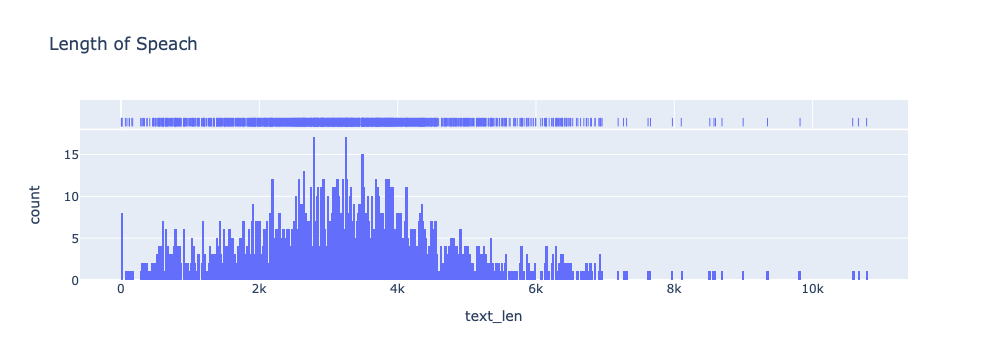

In [68]:
fig = px.histogram(df, x="text_len", marginal="rug",nbins=1000, hover_data=['speaker','title']
                  ,title="Length of Speach")
fig.show()

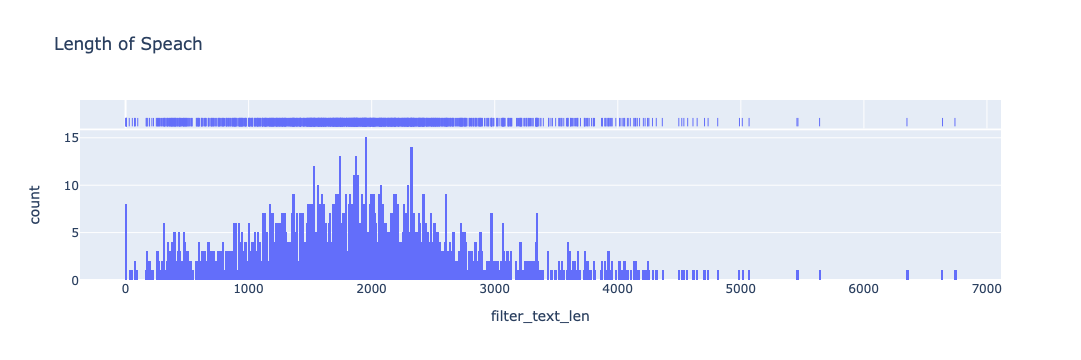

In [69]:
fig = px.histogram(df, x="filter_text_len", marginal="rug",nbins=1000, hover_data=['speaker','title']
                  ,title="Length of Speach")
fig.show()

In [72]:
df0 = df[df['text_len'] < 10]
df0.head()

,link,title,speaker,event,year,text,date,text_len,location,filter_text,filter_text_len
196,https://www.federalreserve.gov/boarddocs/speec...,The politics of monetary policy: Balancing ind...,Governor Laurence H. Meyer,"At the University of Wisconsin, LaCrosse, Wisc...",2000.0,\n\nthe politics of monetary policy: balancing...,20001024.0,9,Wisconsin,politics monetary policy: balancing independen...,6
200,https://www.federalreserve.gov/boarddocs/speec...,The economic outlook and the challenges facing...,Governor Laurence H. Meyer,"At the Century Club Breakfast Series, Washingt...",2000.0,\n\nthe economic outlook and the challenges fa...,20001019.0,9,Missouri,economic outlook challenges facing monetary po...,6
205,https://www.federalreserve.gov/boarddocs/speec...,Why risk management is important for global fi...,Governor Laurence H. Meyer,"Before the Bank of Thailand Symposium, Risk Ma...",2000.0,\n\nwhy risk management is important for globa...,20000831.0,9,Thailand,risk management important global financial ins...,6
212,https://www.federalreserve.gov/boarddocs/speec...,The challenges of global financial institution...,Governor Laurence H. Meyer,At the Federal Financial Institutions Examinat...,2000.0,\n\nthe challenges of global financial institu...,20000531.0,7,Virginia,challenges global financial institution superv...,5
227,https://www.federalreserve.gov/boarddocs/speec...,The economic outlook and the challenges facing...,Governor Laurence H. Meyer,Before the Toronto Association for Business an...,2000.0,\n\nthe economic outlook and the challenges f...,20000412.0,9,Canada,economic outlook challenges facing monetary po...,6


In [77]:
df0

,link,title,speaker,event,year,text,date,text_len,location,filter_text,filter_text_len
196,https://www.federalreserve.gov/boarddocs/speec...,The politics of monetary policy: Balancing ind...,Governor Laurence H. Meyer,"At the University of Wisconsin, LaCrosse, Wisc...",2000.0,\n\nthe politics of monetary policy: balancing...,20001024.0,9,Wisconsin,politics monetary policy: balancing independen...,6
200,https://www.federalreserve.gov/boarddocs/speec...,The economic outlook and the challenges facing...,Governor Laurence H. Meyer,"At the Century Club Breakfast Series, Washingt...",2000.0,\n\nthe economic outlook and the challenges fa...,20001019.0,9,Missouri,economic outlook challenges facing monetary po...,6
205,https://www.federalreserve.gov/boarddocs/speec...,Why risk management is important for global fi...,Governor Laurence H. Meyer,"Before the Bank of Thailand Symposium, Risk Ma...",2000.0,\n\nwhy risk management is important for globa...,20000831.0,9,Thailand,risk management important global financial ins...,6
212,https://www.federalreserve.gov/boarddocs/speec...,The challenges of global financial institution...,Governor Laurence H. Meyer,At the Federal Financial Institutions Examinat...,2000.0,\n\nthe challenges of global financial institu...,20000531.0,7,Virginia,challenges global financial institution superv...,5
227,https://www.federalreserve.gov/boarddocs/speec...,The economic outlook and the challenges facing...,Governor Laurence H. Meyer,Before the Toronto Association for Business an...,2000.0,\n\nthe economic outlook and the challenges f...,20000412.0,9,Canada,economic outlook challenges facing monetary po...,6
240,https://www.federalreserve.gov/boarddocs/speec...,Structural change and monetary policy,Governor Laurence H. Meyer,Before the Joint Conference of the Federal Res...,2000.0,\n\nstructural change and monetary policy\n\n\n,20000303.0,5,Before the Joint Conference of the Federal Res...,structural change monetary policy,4
241,https://www.federalreserve.gov/boarddocs/speec...,Strengthening risk management for derivatives,Governor Laurence H. Meyer,Before the Derivatives Risk Management Symposi...,2000.0,\n\nstrengthening risk management for derivati...,20000225.0,5,New York,strengthening risk management derivatives,4


In [75]:
df0['text'].iloc[0]

'\n\nthe politics of monetary policy: balancing independence and accountability\n\n\n\n'

In [76]:
df0['title'].iloc[0]

'The politics of monetary policy: Balancing independence and accountability'

In [9]:
df.columns

Index(['link', 'title', 'speaker', 'event', 'year', 'text', 'date', 'text_len',
       'location'],
      dtype='object')

In [10]:
df.text_len

0       3671
1       2596
2       4344
3       2527
4       2222
        ... 
1451    4018
1452    4286
1453    1884
1454    1057
1455    4332
Name: text_len, Length: 1456, dtype: int64

In [8]:
corpus = df['text']
corpus

0       I discovered when I joined the Board of Govern...
1        I am privileged to accept the Union League of...
2       The Challenge of Central Banking in a Democrat...
3        It is a pleasure to be with you this morning ...
4       Supervisory and Regulatory Responses to Financ...
                              ...                        
1451     I want to thank Darrell Duffie for inviting m...
1452     It's a great pleasure to be with you today at...
1453     Few sectors are as central to the success of ...
1454     Thank you for the opportunity to join you bri...
1455     Good morning. I am pleased to be here at the ...
Name: text, Length: 1456, dtype: object

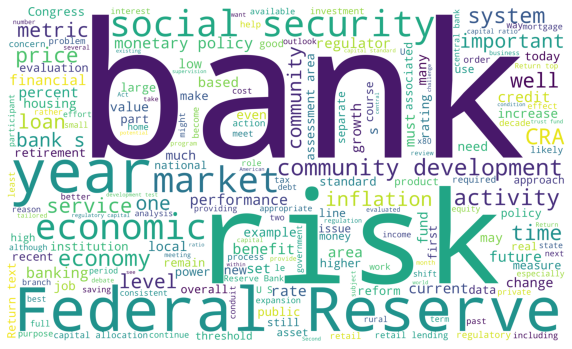

In [8]:
from wordcloud import WordCloud

text = str(df['filter_text'].values)
w = text.split()

words = ' '.join(w)

wordcloud = WordCloud(
                  background_color='white',
                  width=5000,
                  height=3000
                 ).generate(words)
plt.figure(1,figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


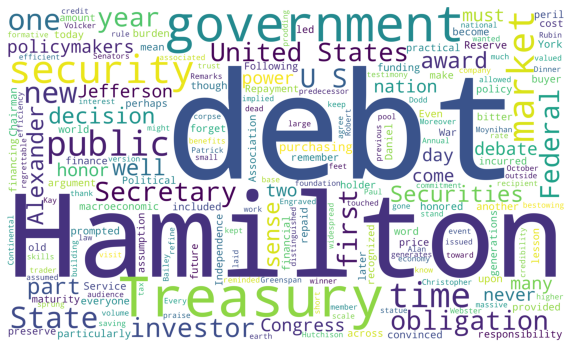

In [9]:
text = str(df['filter_text'].iloc[12])
w = text.split()

words = ' '.join(w)

wordcloud = WordCloud(
                  background_color='white',
                  width=5000,
                  height=3000
                 ).generate(words)
plt.figure(1,figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

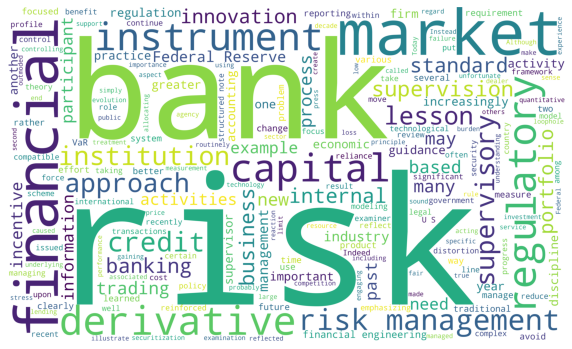

In [10]:
text = str(df['filter_text'].iloc[34])
w = text.split()

words = ' '.join(w)

wordcloud = WordCloud(
                  background_color='white',
                  width=5000,
                  height=3000
                 ).generate(words)
plt.figure(1,figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Sentiment Analysis